In [2]:
import quantumpropagator as qp
from ipywidgets import interactive, interact, HBox, Layout, VBox
import pandas as pd
import os
from tqdm import tqdm_notebook as tqdm
import ipywidgets as widgets
from ipywidgets import interact, fixed
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
%matplotlib notebook


pd.options.display.max_rows = 5

no display found. Using non-interactive Agg backend


In [3]:
fol = 'C:\\Users\\utente\\Desktop\\DATA\\USA'
subfolders = sorted([dir for dir in os.listdir(
    fol) if os.path.isdir(os.path.join(fol, dir))])
print(''.join(['{} -> {}\n'.format(a, b) for a, b in enumerate(subfolders)]))

0 -> Old-m-only-IR-middle140
1 -> b-UV-0.22_0000
2 -> d-experiments_smooth01_0000
3 -> d-experiments_smooth10_0000
4 -> experiment_alessio_0000
5 -> m-IR-Polarized-NOR_0000
6 -> m-only_IR_middle140-9331_0000
7 -> m-only_IR_middle140_0000
8 -> m-only_IR_middle140_div10_0000
9 -> position-from1_0000
10 -> position-from1_mult_0000
11 -> position-from2_0000
12 -> position-from2_mult_0000
13 -> position-from3_0000
14 -> position-from3_mult_0000
15 -> position-from4_0000
16 -> position-from4_mult_0000
17 -> smoothing_only_17_0000
18 -> smoothing_only_9_0000
19 -> y-IR140-S0notdivided_0000
20 -> y-IR_140_nac0_0000
21 -> y-UV-S0notdivided_0000
22 -> z-from1_0000



In [4]:
def from_folder_to_dataframe(folder):
    '''
    this function returns the dataframe given a folder
    '''
    project_folder = os.path.abspath(folder)
    output_norm = os.path.join(project_folder, 'output')
    output_popu = os.path.join(project_folder, 'outputPopul')

    df_norm = pd.read_csv(output_norm, delim_whitespace=True, index_col=0, names=[
                          'counter', 'steps', 'fs', 'Norm deviation', 'Kinetic', 'Potential', 'Total', 'Total Deviation', 'Xpulse', 'Ypulse', 'Zpulse', 'AbZino'])
    df_popu = pd.read_csv(output_popu, delim_whitespace=True, names=[
                          'fs', 'S0', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7'])
    df_all = pd.concat([df_norm, df_popu], axis=1)

    output_abso = os.path.join(project_folder, 'Output_Abs')
    if os.path.isfile(output_abso):
        df_abso = pd.read_csv(output_abso, delim_whitespace=True, names=[
                              'Time AU', 'Abs Tot', 'Abs S0', 'Abs S1', 'Abs S2', 'Abs S3', 'Abs S4', 'Abs S5', 'Abs S6', 'Abs S7'])
        df_all = pd.concat([df_all, df_abso], axis=1)

    return(df_all)

In [5]:
numbers = [0, 2, 18]
names = [subfolders[x] for x in numbers]
names = ['$S_1/S_2$ manually changed', '17-9-9-1 Kernel', '9-3-3-1 Kernel']
dfs = [from_folder_to_dataframe(
    os.path.join(fol, subfolders[x])) for x in numbers]

# Smoothing effects

<IPython.core.display.Javascript object>


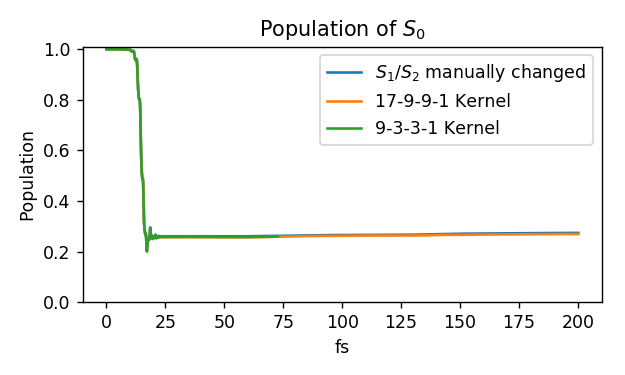

In [6]:
def make_population_graphs(multiple_dataframes, names, rangeS):
    for state in rangeS:
        fig, ax0 = plt.subplots(1, 1, figsize=(5, 3))
        ax0.set_xlabel('fs')
        ax0.set_ylabel('Population')
        ax0.set_ylim(0, 1.01)
        ax0.set_title(r'Population of $S_{}$'.format(state))
        for i, df in enumerate(multiple_dataframes):
            ax0.plot(df['fs'].iloc[:, 1],
                     df['S{}'.format(state)], label=names[i])
        ax0.legend()
        fig.tight_layout()


how_many_states = 1
make_population_graphs(dfs, names, range(how_many_states))